1.5 Exercise
1. Load the Diabetes dataset from Scikit-Learn.
2. Determine the relevant features using correlation measure.
3. Build a linear regression model using least squares or Gradient Descent to predict diabetes
progression.
4. Evaluate the performance of the models.


# 1.1 Input Data


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


In [3]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
print(diabetes.feature_names)
print(diabetes.data.shape) 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)


In [6]:
#converting diabetes.data into a Pandas DataFrame
diabetes_pd = pd.DataFrame(diabetes.data)
diabetes_pd.head()


,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
#replace those numbers "column" with the feature names.

diabetes_pd.columns = diabetes.feature_names
diabetes_pd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
#We can append the target to thediabetes_pd DataFrame. It will be appended as the last column
diabetes_pd['s6'] = diabetes.target
diabetes_pd.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,135.0


# 1.2 Discover and Visualize the Data to Gain Insights


In [9]:
corr_matrix = diabetes_pd.corr()
corr_matrix['s6'].sort_values(ascending=True)

s3    -0.394789
sex    0.043062
s2     0.174054
age    0.187889
s1     0.212022
s4     0.430453
bp     0.441484
s5     0.565883
bmi    0.586450
s6     1.000000
Name: s6, dtype: float64

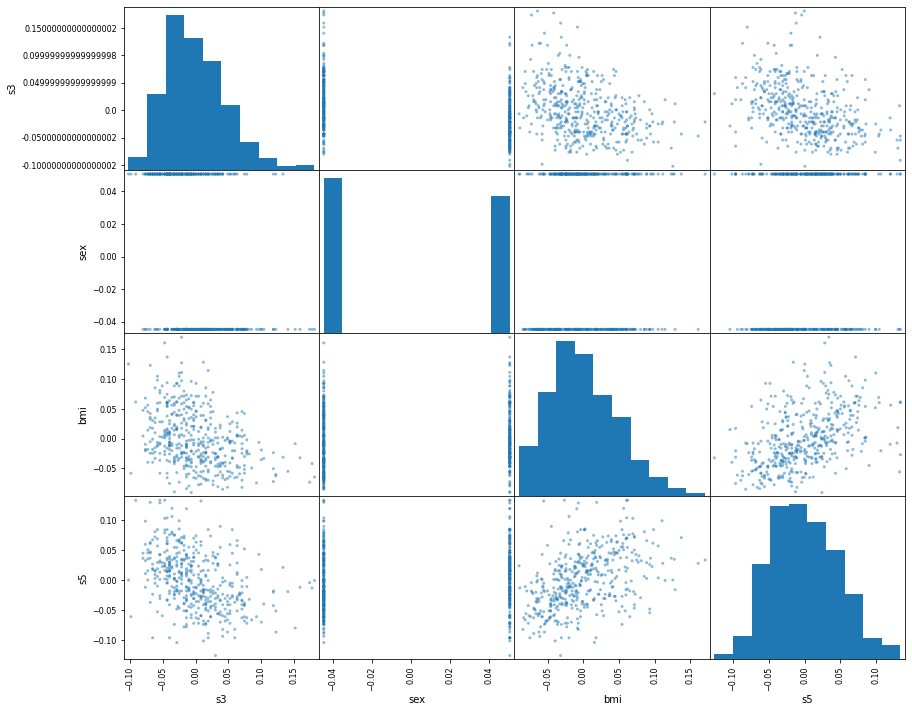

In [10]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

attr = ['s3', 'sex', 'bmi','s5']
scatter_matrix(diabetes_pd[attr], figsize=(14,12))
plt.show()


Text(0.5, 1.0, 'Relationship blood sugar level and BMI')

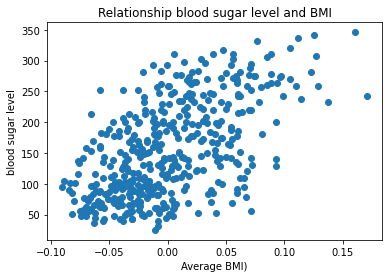

In [11]:
from matplotlib import pyplot as plt
plt.scatter(diabetes_pd.bmi, diabetes_pd.s6)
plt.xlabel('Average BMI)')
plt.ylabel('blood sugar level')
plt.title('Relationship blood sugar level and BMI')


# Least Squares Linear Regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(diabetes_pd[['s3','sex','bmi','s5']],diabetes_pd.iloc[:,-1],random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 4)
(331,)
(111, 4)
(111,)


In [13]:
# import LinearRegression from Scikit-learn
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()


In [14]:
#Once we have created the object, we can call the fit method to learn the train data. Score method returns the accuracy measure of the model based on the train data. The best possible score is 1.0.
reg_ls.fit(X_train, y_train)
reg_ls.score(X_train, y_train)


0.5032178899026052

In [15]:
#print the intercept and the estimated coefficients of the model.

print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)



Estimated intercept coefficients:  151.38873997551468
Number of coefficients:  4
Coefficients:  [-260.02722072 -165.8221322   681.71413527  516.54921094]


In [16]:
#construct a DataFrame that contains features and estimated coefficients

pd.DataFrame(np.array((X_train.columns, reg_ls.coef_)).T,columns=['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,s3,-260.027221
1,sex,-165.822132
2,bmi,681.714135
3,s5,516.549211


In [17]:
# run some prediction on the first blood sugar level.
reg_ls.predict(X_test)[0:5]


array([145.64288297, 114.62170924, 193.78126913,  79.45049389,
       160.99195559])

In [18]:
# And compare the predicted  blood sugar level with the  blood sugar level. We can see some error in the prediction.
y_test[0:5]

246     78.0
425    152.0
293    200.0
31      59.0
359    311.0
Name: s6, dtype: float64

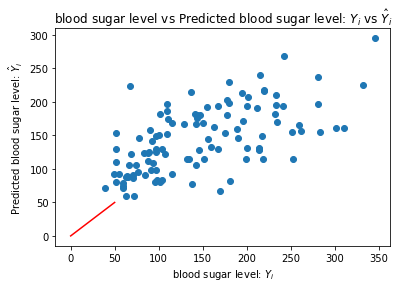

In [19]:
# run predictions on the whole test data
y_pred_ls = reg_ls.predict(X_test)
# plot prediction and actual data
plt.scatter(y_test, y_pred_ls)
plt.xlabel('blood sugar level: $Y_i$')
plt.ylabel('Predicted blood sugar level: $\hat{Y}_i$')
plt.title('blood sugar level vs Predicted blood sugar level: $Y_i$ vs $\hat{Y}_i$')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')


In [20]:
#Let’s calculate the errors of our predictions.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred_ls))
print(mean_squared_error(y_test, y_pred_ls))
print(r2_score(y_test, y_pred_ls))

45.02530450263857
3226.0406025232646
0.3821218616980364


# 1.4 Linear Regression using Gradient Descent

In [21]:
#Import SGDRegressor from Scikit-learn, and then create an object of SGDRegressor. Some parameters need to be set as follows.

from sklearn.linear_model import SGDRegressor
reg_gd = SGDRegressor(loss='huber', eta0=0.35, max_iter=5500,
early_stopping=False, tol=None, verbose=1, random_state=1)
reg_gd.fit(X_train, y_train)
y_pred_gd = reg_gd.predict(X_test)


-- Epoch 1
Norm: 0.01, NNZs: 4, Bias: 3.597048, T: 331, Avg. loss: 15.156470
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4, Bias: 6.065448, T: 662, Avg. loss: 14.874289
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4, Bias: 8.229684, T: 993, Avg. loss: 14.644307
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 4, Bias: 10.217332, T: 1324, Avg. loss: 14.437315
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 4, Bias: 12.083195, T: 1655, Avg. loss: 14.244942
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 4, Bias: 13.857409, T: 1986, Avg. loss: 14.063116
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.05, NNZs: 4, Bias: 15.558860, T: 2317, Avg. loss: 13.889448
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.05, NNZs: 4, Bias: 17.200404, T: 2648, Avg. loss: 13.722377
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.05, NNZs: 4, Bias: 18.791306, T: 2979, Avg. loss: 13.560812
Total training 

In [22]:
# Calculate the error of predictions and plot the ground truth against the model prediction.
print(mean_absolute_error(y_test, y_pred_gd))
print(mean_squared_error(y_test, y_pred_gd))
print(r2_score(y_test, y_pred_gd))


59.46611202907261
5118.082965729899
0.01974216565447673


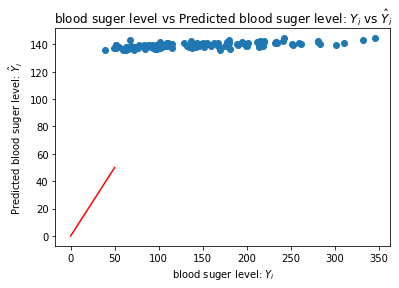

In [23]:
plt.scatter(y_test, y_pred_gd)
plt.xlabel('blood suger level: $Y_i$')
plt.ylabel('Predicted blood suger level: $\hat{Y}_i$')
plt.title('blood suger level vs Predicted blood suger level: $Y_i$ vs $\hat{Y}_i$')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')
